In [ ]:
!pip install ta
!pip install pandas_ta
!pip install breeze-connect

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29089 sha256=76e7ebd61161f272d128372a28f9f2a90909a73e4540f14176fa5a0892ad7437
  Stored in directory: /root/.cache/pip/wheels/47/51/06/380dc516ea78621870b93ff65527c251afdfdc5fa9d7f4d248
Successfully built ta
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218908 sha256=6b796237a046f8f171e015768b902672faa8e0b63698bea0fc6348aff10aa63b
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.2 MB/s

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime , timedelta
from dateutil.relativedelta import relativedelta,TH , TU,FR
import warnings
warnings.filterwarnings('ignore')
import ta
import pandas_ta as ta
import matplotlib.pyplot as plt
from breeze_connect import BreezeConnect


from breeze_connect import BreezeConnect

# Initialize SDK
breeze = BreezeConnect(api_key="f65&396497Vq0161W2d18ngV35%5755@")

# Obtain your session key from https://api.icicidirect.com/apiuser/login?api_key=YOUR_API_KEY
# Incase your api-key has special characters(like +,=,!) then encode the api key before using in the url as shown below.
import urllib
print("https://api.icicidirect.com/apiuser/login?api_key="+urllib.parse.quote_plus("your_api_key"))

# Generate Session
breeze.generate_session(api_secret="5l88!0708cJ04~74!X1V71a90j4~392+",
                        session_token="24564132")

https://api.icicidirect.com/apiuser/login?api_key=your_api_key


In [ ]:
!pip install py_vollib

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 4.4 MB/s eta 0:00:00
  Created wheel for py_vollib: filename=py_vollib-1.0.1-py3-none-any.whl size=62829 sha256=febbed4563734069a81f5237851a2a953e112a32222b545bab1d14d7d09216cf
  Stored in directory: /root/.cache/pip/wheels/84/0c/fc/b68506eda40cccaeb0013be550ba904d253ec90eae2b156052
  Created wheel for py_lets_be_rational: filename=py_lets_be_rational-1.0.1-py3-none-any.whl size=24452 sha256=7a70347a56d14eb69481f997e9bdb646cbd023119bf45265b36ff0e4e20d2760
  Stored in directory: /root/.cache/pip/wheels/32/d9/4f/360d4b0b9ec7c65583ec7c8e72fd2158c97ad04fbcb932891c
Successfully built py_vollib py_lets_be_rational


In [ ]:
from py_vollib.black_scholes.implied_volatility import implied_volatility

In [ ]:
price = 150.50
S = 17539.45
K = 17550
t = (datetime(2022,9,8,15,30,0) - datetime(2022,9,2,15,30,0))/timedelta(days=1)/365
r= 0.1
flag = 'c'

In [ ]:
(datetime(2022,9,8,15,30,0) - datetime.now())/timedelta(days=1)/365

-1.1177560674712075

In [ ]:
implied_volatility(price,S,K,t,r,flag)*100

15.744653758607887

In [ ]:
n = breeze.get_historical_data_v2(interval="1day",
                            from_date= "2023-01-01T07:00:00.000Z",
                            to_date= "2023-07-18T07:00:00.000Z",
                            stock_code="NIFTY",
                            exchange_code="NSE",
                            product_type="cash")
nifty =pd.DataFrame(n['Success'])
nifty.index = nifty.datetime
nifty.drop( columns = {'datetime' , 'exchange_code' , 'stock_code' , 'volume'}  , inplace = True)
nifty.rename( {'datetime' : 'date'} , inplace = True)
nifty['Expiry'] = 0
for i in range (len(nifty)) :
    nifty['Expiry'].iloc[i] = pd.to_datetime(nifty.index[i]).date() + relativedelta( weekday=TH(+1))
    nifty['weekday'] = pd.to_datetime(nifty['Expiry'][i]).weekday()
nifty[80:134]

,close,high,low,open,Expiry,weekday
datetime,,,,,,
2023-05-03 00:00:00,18082.70,18116.25,18043.35,18113.80,2023-05-04,3
2023-05-04 00:00:00,18238.60,18267.45,18066.70,18081.00,2023-05-04,3
2023-05-05 00:00:00,18069.95,18216.85,18055.70,18117.30,2023-05-11,3
2023-05-08 00:00:00,18269.75,18286.70,18102.40,18120.60,2023-05-11,3
2023-05-09 00:00:00,18258.30,18343.90,18230.45,18303.40,2023-05-11,3
2023-05-10 00:00:00,18311.00,18326.30,18212.55,18313.60,2023-05-11,3
2023-05-11 00:00:00,18304.50,18357.80,18270.80,18357.80,2023-05-11,3
2023-05-12 00:00:00,18312.20,18342.00,18194.85,18273.75,2023-05-18,3
2023-05-15 00:00:00,18384.60,18458.25,18291.50,18339.30,2023-05-18,3


In [ ]:
from_date = '2023-07-07T07:00:00.000Z'
to_date = '2023-07-14T07:00:00.000Z'
expiry_date = '2023-07-13T07:00:00.000Z'

In [ ]:
n = breeze.get_historical_data_v2(interval="5minute",
                            from_date= from_date,
                            to_date= to_date,
                            stock_code="NIFTY",
                            exchange_code="NSE",
                            product_type="cash")
nifty =pd.DataFrame(n['Success'])
nifty.index = nifty.datetime
nifty.drop( columns = {'datetime' , 'exchange_code' , 'stock_code' , 'volume'}  , inplace = True)
nifty.rename( {'datetime' : 'date'} , inplace = True)

In [ ]:
nifty['time'] = 0
for i in range (len(nifty)) :
  nifty['time'].iloc[i] = nifty.index[i][11:16]

nifty = nifty[nifty['time'] != '09:05']
nifty = nifty[nifty['time'] != '09:10']

In [ ]:
nifty['timedl'] = 0
for p in range (len(nifty)) :
  p_d = []
  if nifty['time'].iloc[p][0:2][0] == '0' :
    p_d.append( nifty['time'].iloc[p][0:2][1])

  if ( nifty['time'].iloc[p][0:2][0] != '0') :
    p_d.append( nifty['time'].iloc[p][0:2] )


  if nifty['time'].iloc[p][3:5][0] == '0' :
    p_d.append( nifty['time'].iloc[p][3:5][1] )


  if ( nifty['time'].iloc[p][3:5][0] != '0') :
    p_d.append( nifty['time'].iloc[p][3:5] )

  nifty['timedl'].iloc[p] = p_d

In [ ]:
strike_multiple = 50
atm_strike = strike_multiple*( round(nifty['close'].iloc[0] / strike_multiple ) )

In [ ]:
t = 0
sd = 2
ms = atm_strike + 50*t
s1 = ms + 50*sd
s2 = ms- 50*sd

In [ ]:
opt_price = []
for side in ['CALL', 'PUT'] :
  for stk in [s1,s2] :
    n = breeze.get_historical_data(interval="5minute",
                            from_date= from_date,
                            to_date= to_date,
                            stock_code="NIFTY",
                            exchange_code="NFO",
                            product_type="options",
                            expiry_date= expiry_date,
                            right= side,
                            strike_price= str(stk)  )
    opt =pd.DataFrame(n['Success'])
    opt.index = opt.datetime
    opt.drop( columns = {'datetime' , 'exchange_code' , 'stock_code' , 'volume' , 'open_interest' , 'count','product_type', 'expiry_date'}  , inplace = True)
    opt.rename( {'datetime' : 'date'} , inplace = True)
    opt['close'] = opt['close'].astype(float).astype(int)
    opt_price.append(opt)


In [ ]:
opt_price[0]

,right,strike_price,open,high,low,close
datetime,,,,,,
2023-07-07 09:15:00,Call,19550,55.9,64.7,54.8,59
2023-07-07 09:20:00,Call,19550,58.9,65.4,57.4,65
2023-07-07 09:25:00,Call,19550,64.95,68.7,64.75,68
2023-07-07 09:30:00,Call,19550,68.05,72,66,69
2023-07-07 09:35:00,Call,19550,69.7,71.65,67.25,70
...,...,...,...,...,...,...
2023-07-13 15:05:00,Call,19550,.3,.3,.15,0
2023-07-13 15:10:00,Call,19550,.15,.2,.1,0
2023-07-13 15:15:00,Call,19550,.1,.15,.1,0


In [ ]:
cols = ['STRIKE' , 'RIGHT', 'PRICE' , 'ACTION' , 'NET']
act = [-1,1,1,-1]
d = []
for i in range(len(opt_price)) :
  strike = opt_price[i]['strike_price'][0]
  right = opt_price[i]['right'][0]
  price = opt_price[i]['close'][0]
  action = act[i]
  net = action*int(price)
  d.append([strike,right,price,action,net])


In [ ]:
box_strat = pd.DataFrame(d , columns = cols)

In [ ]:
box_strat['NET'].sum()

201

In [ ]:
box_strat

,STRIKE,RIGHT,PRICE,ACTION,NET
0,19550,Call,59,-1,-59
1,19350,Call,166,1,166
2,19550,Put,158,1,158
3,19350,Put,64,-1,-64


In [ ]:
cols = ['STRIKE' , 'RIGHT', 'PRICE' , 'ACTION' , 'NET']
box_box = []
stdd = []
iv = [[],[],[],[]]
flag = ['c','c','p','p']
for j in range (len(nifty)) :
  act = [-1,1,1,-1]
  d = []
  for i in range(len(opt_price)) :
    strike = opt_price[i]['strike_price'][j]
    right = opt_price[i]['right'][j]
    price = opt_price[i]['close'][j]
    action = act[i]
    net = action*int(price)
    d.append([strike,right,price,action,net])

  box_strat = pd.DataFrame(d , columns = cols)
  #print(box_strat)
  box_box.append( box_strat['NET'].sum())
  stdd.append(s1-s2)

  #for l in range (len(iv)) :
  #  price = box_strat['PRICE'].iloc[l]
  #  S = nifty['close'].iloc[j]
  #  K = int(box_strat['STRIKE'].iloc[l])
  #  t = (datetime(int(expiry_date[0:4]),int(expiry_date[5:7]),int(expiry_date[8:10]),15,30,0) - datetime(int(nifty.index[j][0:4]),int(nifty.index[j][5:7]),int(nifty.index[j][8:10]),int(nifty['timedl'].iloc[j][0]),int(nifty['timedl'].iloc[j][1]),0))/timedelta(days=1)/365
  #  r= 0.1
  #  flag1 = flag[l]
  #  print(price , S,K,t,flag1)
  #  iv[l].append(implied_volatility(price,S,K,t,r,flag1)*100)


<Axes: >

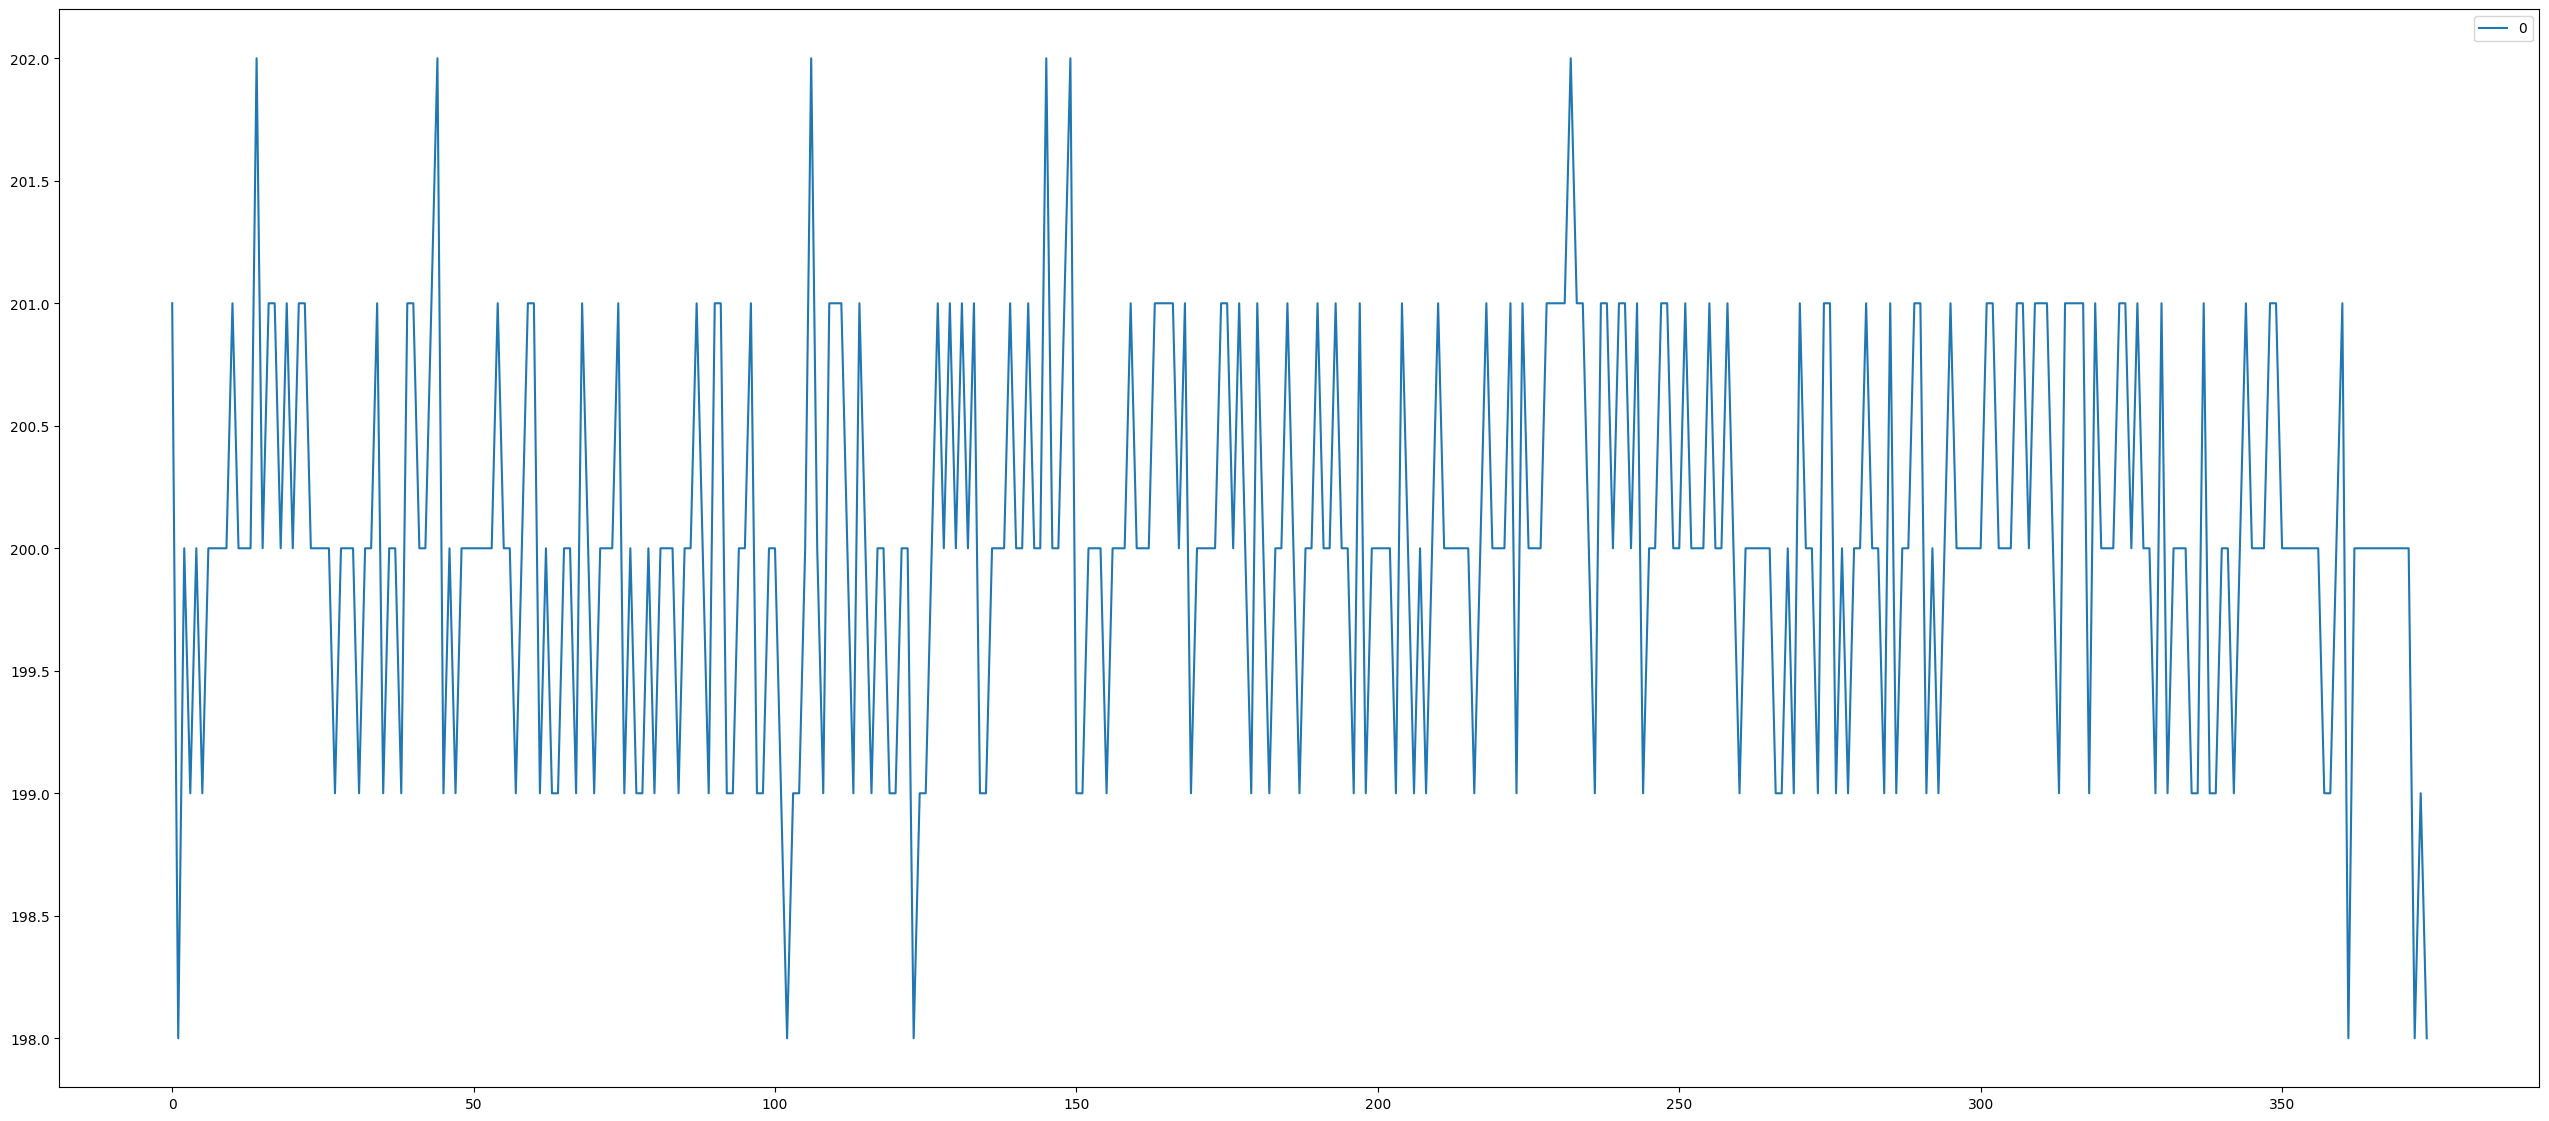

In [ ]:
pd.DataFrame(box_box).plot(figsize = (32,14))

In [ ]:
#pd.DataFrame( (np.array(iv[0][0:294]) + np.array(iv[1][0:294]) + np.array(iv[2]) + np.array(iv[3]))/4 ).plot(figsize = (32,14))

STOCKS

In [ ]:
n = breeze.get_historical_data_v2(interval="1day",
                            from_date= "2023-01-01T07:00:00.000Z",
                            to_date= "2023-07-30T07:00:00.000Z",
                            stock_code="TCS",
                            exchange_code="NSE",
                            product_type="cash")
nifty =pd.DataFrame(n['Success'])
nifty.index = nifty.datetime
nifty.drop( columns = {'datetime' , 'exchange_code' , 'stock_code' , 'volume'}  , inplace = True)
nifty.rename( {'datetime' : 'date'} , inplace = True)
nifty['Expiry'] = 0
for i in range (len(nifty)) :
    nifty['Expiry'].iloc[i] = pd.to_datetime(nifty.index[i]).date() + relativedelta( day=31, weekday=TH(-1))
    nifty['weekday'] = pd.to_datetime(nifty['Expiry'][i]).weekday()
nifty[0:50]

,close,high,low,open,Expiry,weekday
datetime,,,,,,
2023-01-02 00:00:00,3261.45,3266.85,3235.20,3261.00,2023-01-26,3
2023-01-03 00:00:00,3311.35,3320.00,3245.30,3252.00,2023-01-26,3
2023-01-04 00:00:00,3313.10,3327.35,3286.20,3306.70,2023-01-26,3
2023-01-05 00:00:00,3311.10,3337.30,3281.95,3330.20,2023-01-26,3
2023-01-06 00:00:00,3213.90,3301.55,3200.00,3300.00,2023-01-26,3
2023-01-09 00:00:00,3309.00,3327.00,3221.15,3229.00,2023-01-26,3
2023-01-10 00:00:00,3286.40,3298.00,3230.10,3285.00,2023-01-26,3
2023-01-11 00:00:00,3328.70,3349.50,3271.15,3290.10,2023-01-26,3
2023-01-12 00:00:00,3337.55,3350.00,3315.55,3329.00,2023-01-26,3


In [ ]:
from_date = '2023-10-03T07:00:00.000Z'
to_date = '2023-10-27T07:00:00.000Z'
expiry_date = '2023-10-26T07:00:00.000Z'

In [ ]:
n = breeze.get_historical_data_v2(interval="5minute",
                            from_date= from_date,
                            to_date= to_date,
                            stock_code="NIFTY",
                            exchange_code="NSE",
                            product_type="cash")
nifty =pd.DataFrame(n['Success'])
nifty.index = nifty.datetime
nifty.drop( columns = {'datetime' , 'exchange_code' , 'stock_code' , 'volume'}  , inplace = True)
nifty.rename( {'datetime' : 'date'} , inplace = True)

In [ ]:
nifty['time'] = 0
for i in range (len(nifty)) :
  nifty['time'].iloc[i] = nifty.index[i][11:16]

nifty = nifty[nifty['time'] != '09:05']
nifty = nifty[nifty['time'] != '09:10']

In [ ]:
nifty['timedl'] = 0
for p in range (len(nifty)) :
  p_d = []
  if nifty['time'].iloc[p][0:2][0] == '0' :
    p_d.append( nifty['time'].iloc[p][0:2][1])

  if ( nifty['time'].iloc[p][0:2][0] != '0') :
    p_d.append( nifty['time'].iloc[p][0:2] )


  if nifty['time'].iloc[p][3:5][0] == '0' :
    p_d.append( nifty['time'].iloc[p][3:5][1] )


  if ( nifty['time'].iloc[p][3:5][0] != '0') :
    p_d.append( nifty['time'].iloc[p][3:5] )

  nifty['timedl'].iloc[p] = p_d

In [ ]:
strike_multiple = 50
atm_strike = strike_multiple*( round(nifty['close'].iloc[0] / strike_multiple ) )

In [ ]:
t = 0
sd = 2
ms = atm_strike + 50*t
s1 = ms + 50*sd
s2 = ms- 50*sd

In [ ]:
opt_price = []
for side in ['CALL', 'PUT'] :
  for stk in [s1,s2] :
    n = breeze.get_historical_data(interval="5minute",
                            from_date= from_date,
                            to_date= to_date,
                            stock_code="NIFTY",
                            exchange_code="NFO",
                            product_type="options",
                            expiry_date= expiry_date,
                            right= side,
                            strike_price= str(stk)  )
    opt =pd.DataFrame(n['Success'])
    opt.index = opt.datetime
    opt.drop( columns = {'datetime' , 'exchange_code' , 'stock_code' , 'volume' , 'open_interest' , 'count','product_type', 'expiry_date'}  , inplace = True)
    opt.rename( {'datetime' : 'date'} , inplace = True)
    opt['close'] = opt['close'].astype(float).astype(int)
    opt_price.append(opt)


In [ ]:
cols = ['STRIKE' , 'RIGHT', 'PRICE' , 'ACTION' , 'NET']
act = [-1,1,1,-1]
d = []
for i in range(len(opt_price)) :
  strike = opt_price[i]['strike_price'][0]
  right = opt_price[i]['right'][0]
  price = opt_price[i]['close'][0]
  action = act[i]
  net = action*int(price)
  d.append([strike,right,price,action,net])


In [ ]:
cols = ['STRIKE' , 'RIGHT', 'PRICE' , 'ACTION' , 'NET']
box_box = []
stdd = []
iv = [[],[],[],[]]
flag = ['c','c','p','p']
for j in range (len(nifty)) :
  act = [-1,1,1,-1]
  d = []
  for i in range(len(opt_price)) :
    strike = opt_price[i]['strike_price'][j]
    right = opt_price[i]['right'][j]
    price = opt_price[i]['close'][j]
    action = act[i]
    net = action*int(price)
    d.append([strike,right,price,action,net])

  box_strat = pd.DataFrame(d , columns = cols)
  #print(box_strat)
  box_box.append( box_strat['NET'].sum())
  stdd.append(s1-s2)

<Axes: >

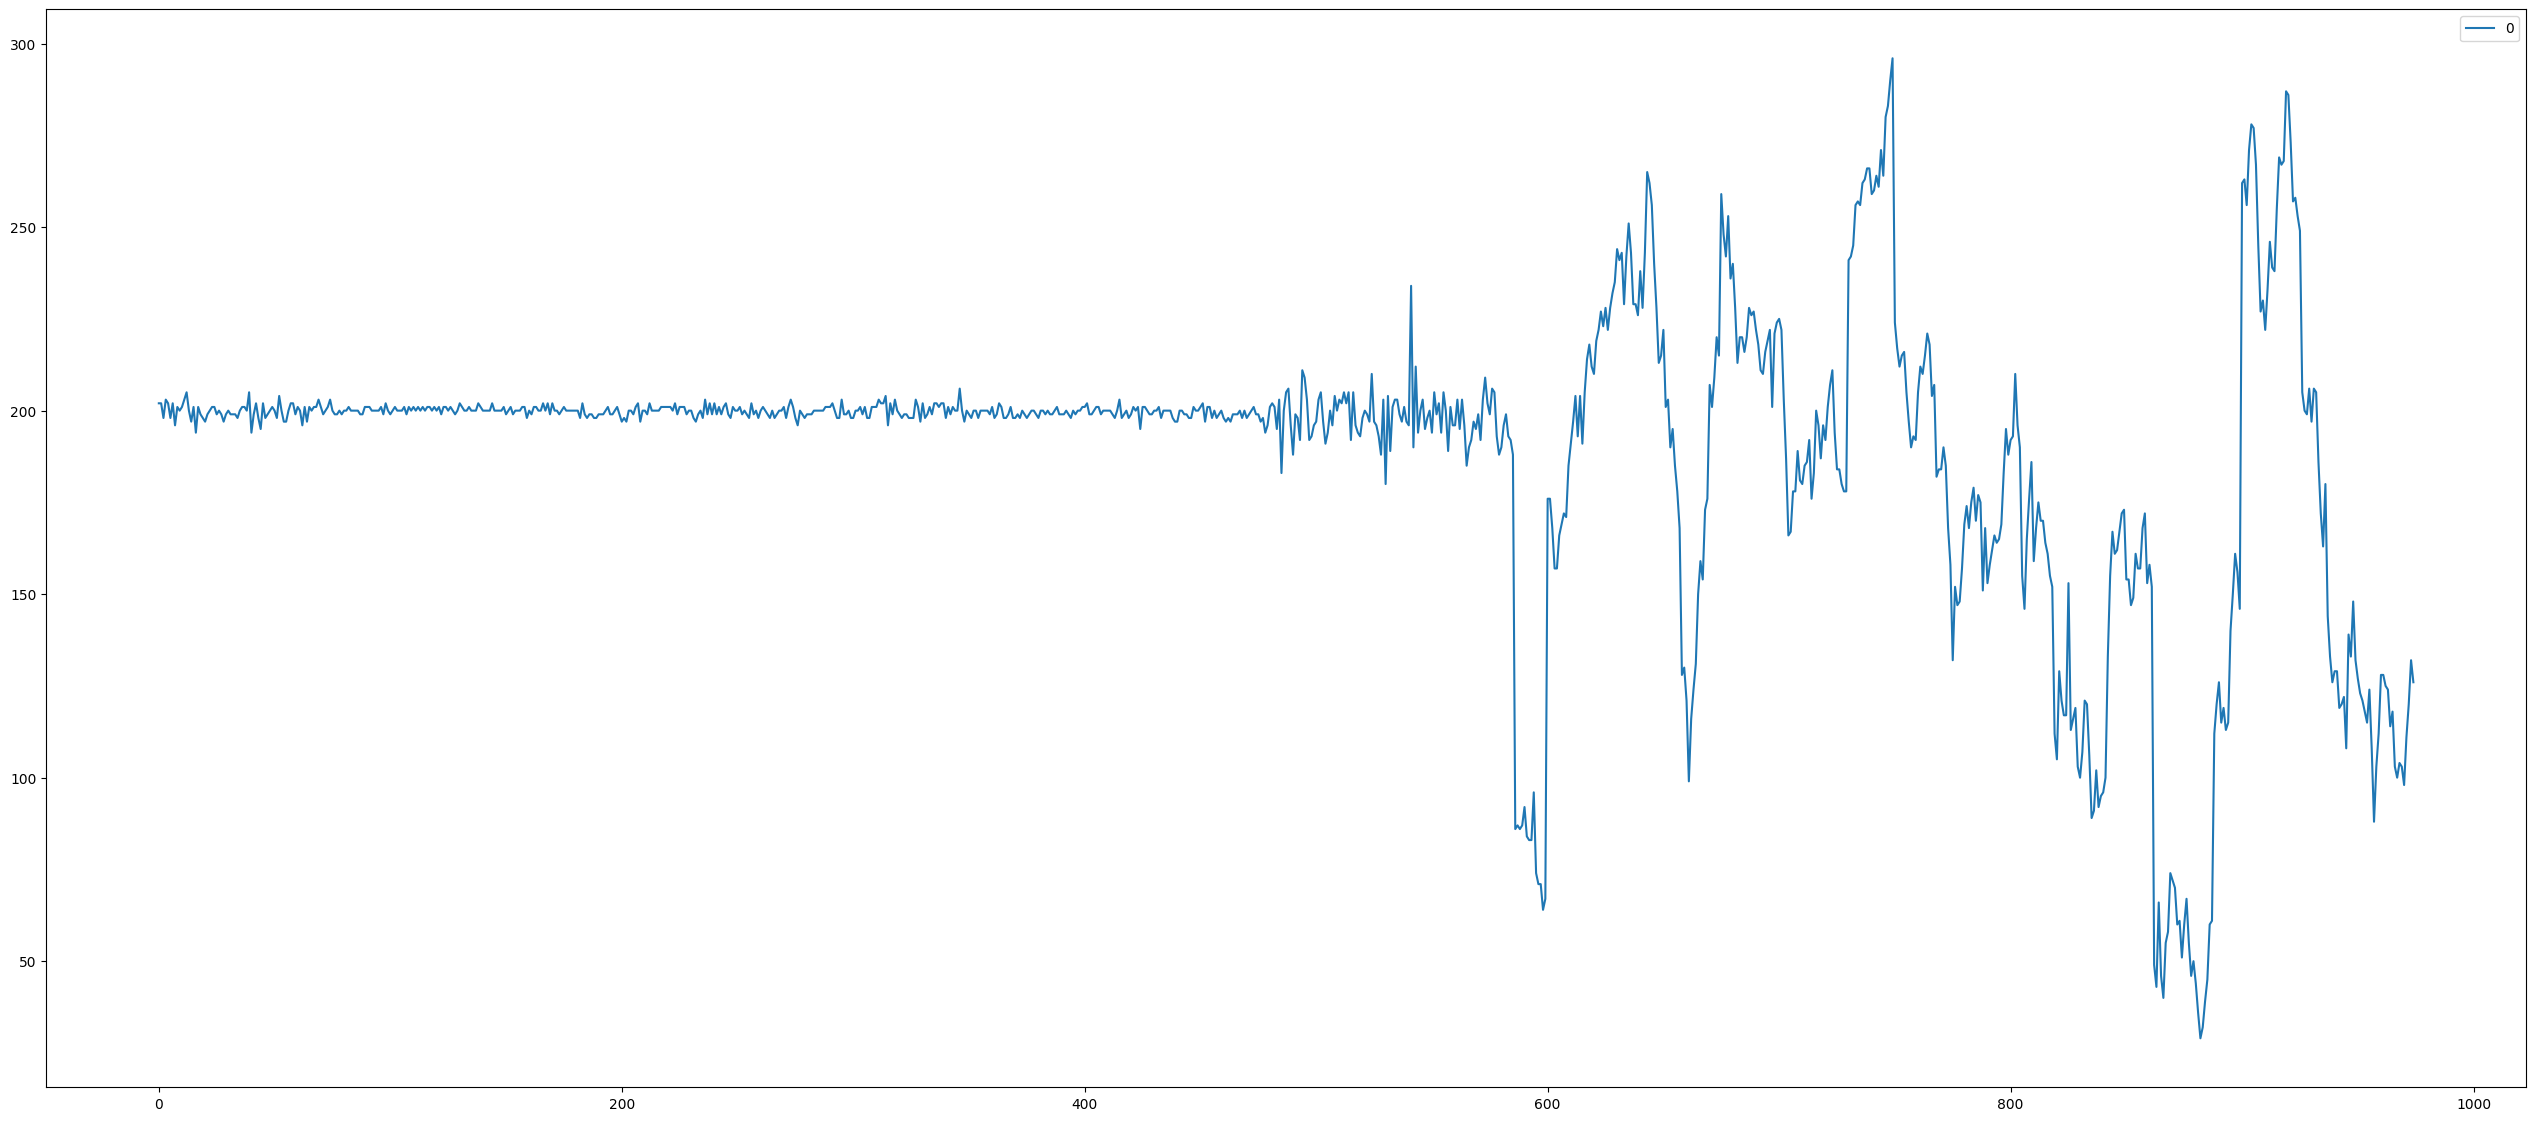

In [ ]:
pd.DataFrame(box_box).plot(figsize = (32,14))

#                **MORE ARBITRAGE OPTIONS SPREAD**
1) Box strategy. : bull call spread and bear put spread or opposite.

2) Synthetic fut : (same strike ce+pe) will become fut, then selll Or buy actual fut.

3) short strangle and long strangle spread.

4) synthetic fut variation : buy sell 1 strike and buy sell another strike then short, long 2 futures.

5) stock fut spread, near and far fit spread.

6)https://youtu.be/19gPNlMTpGA?si=UBOpat5MWxS0EgPh : sell atm strike
 and buy 1 otm strike and 1 itm strike. (Spread)

7) butterfly: long short butterfly spread.


8) try : long condor and bear condor spread.
9) calender and calendar opposite spread.
10) strangle calendar spread: example if nifty at 19800 then call sell 20000 and put sell 19600 , buy 20000 call next expiry and buy 19600 put next expiry. Now opposite of above. Make spread.
11) iron fly and butterfly spread.